In [1]:
#Create Access to my code
import sys
sys.path.insert(1, '../vidr/')

#Import hte vaedr functions we have created
from vidr import VIDR
from utils import *

#Import important modules
import scanpy as sc
import scgen as scg
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import gseapy as gp
from scipy import stats
from scipy import linalg
from scipy import spatial
from anndata import AnnData
from scipy import sparse
from statannotations.Annotator import Annotator
from matplotlib import pyplot as plt

#For calculating statistical distance
import geomloss
import pykeops
import pykeops
pykeops.clean_pykeops()          # just in case old build files are still present
pykeops.test_numpy_bindings()    # perform the compilation

import scvi
sc.set_figure_params(dpi = 150)
sc.settings.figdir = "../Figure"
sns.set_style("dark")

/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[KeOps] /mnt/home/kanaomar/.cache/keops2.0/build_CUDA_VISIBLE_DEVICES_0_1_2_3 has been cleaned.
[KeOps] Compiling cuda jit compiler engine ... OK
[pyKeOps] Compiling nvrtc binder for python ... OK
[KeOps] Generating code for formula Sum_Reduction((Var(0,3,0)-Var(1,3,1))|(Var(0,3,0)-Var(1,3,1)),1) ... OK
pyKeOps with numpy bindings is working!


In [2]:
adata = sc.read_h5ad("../data/nault2021_singleDose.h5ad")

In [3]:
#Prepare Data Set
cell_types_of_int = ["Hepatocytes - central", "Hepatocytes - portal", "Cholangiocytes", "Stellate Cells", "Portal Fibroblasts", "Endothelial Cells"]
adata = adata[adata.obs['celltype'].isin(cell_types_of_int)]

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
adata.obs["dose"] = [str(d) for d in adata.obs.Dose]
adata = adata[:,adata.var.highly_variable]

/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


## SupplementaryFigure 5E

Cholangiocytes
INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 18265 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          
None


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Set SLURM handle signals.


Epoch 35/100:  35%|███▌      | 35/100 [02:16<04:12,  3.89s/it, loss=109, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18265 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 2355 cells, 5000 vars, 2 batches, 
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 28520 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/mnt/home/kanao

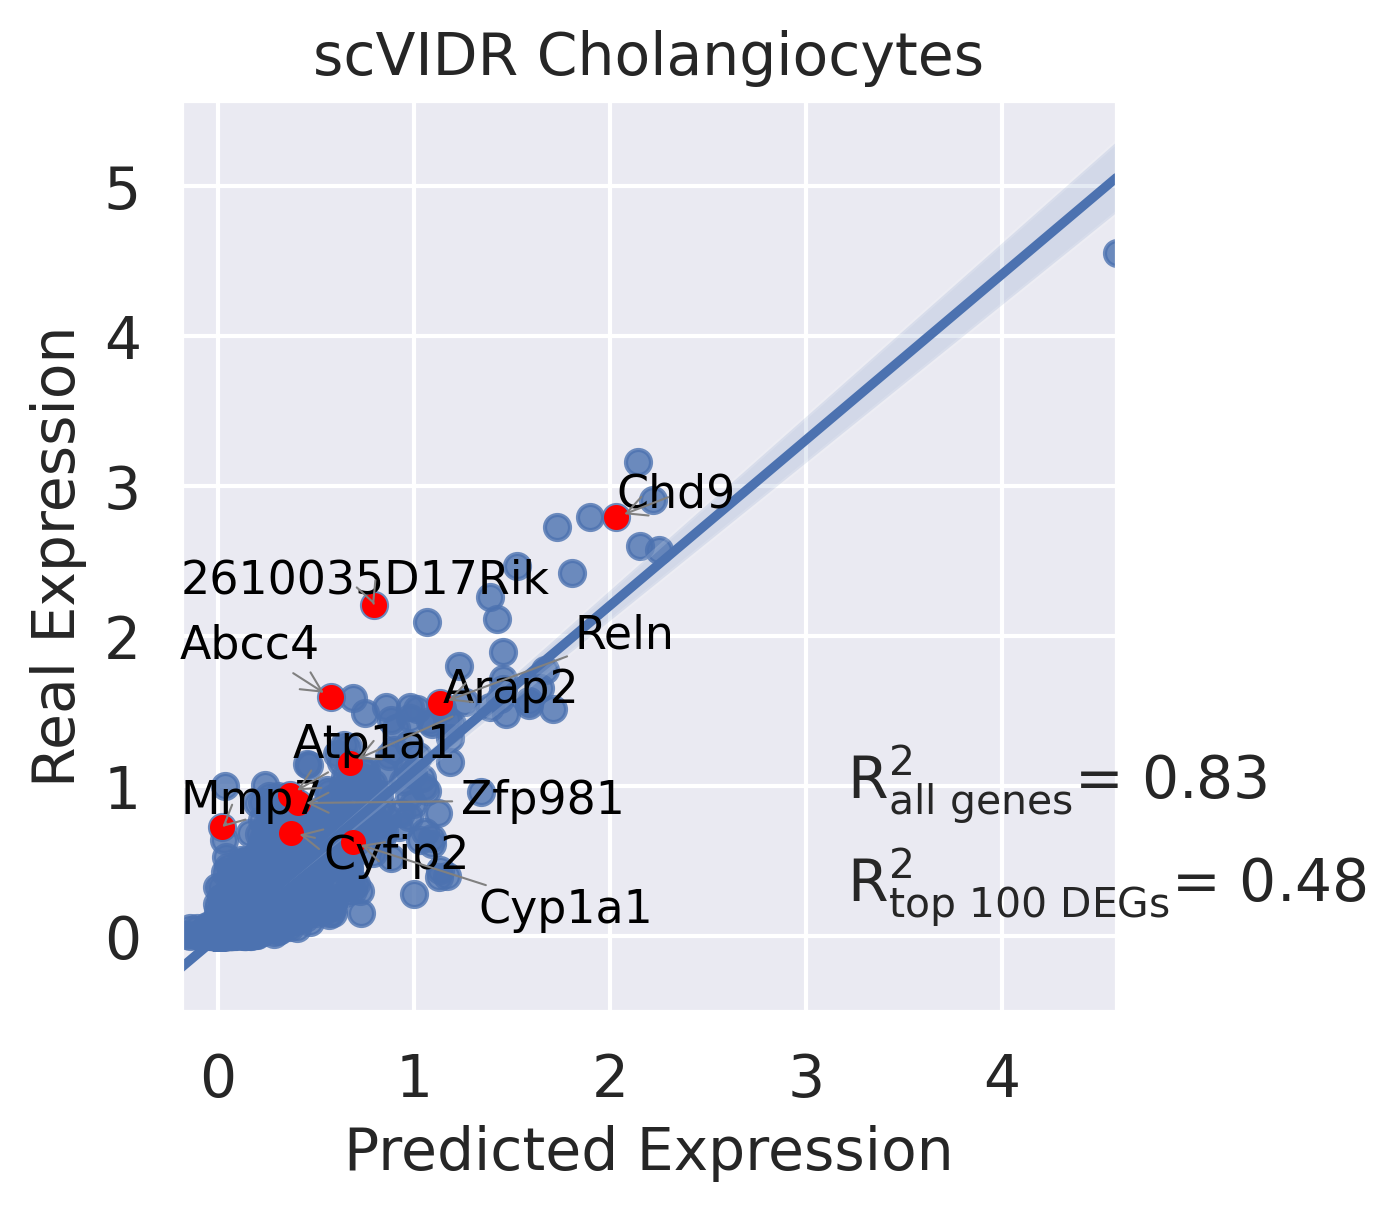

Portal Fibroblasts
INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 18789 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Set SLURM handle signals.


None
Epoch 43/100:  43%|████▎     | 43/100 [03:15<04:18,  4.54s/it, loss=105, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18789 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 2419 cells, 5000 vars, 2 batches, 
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 28520 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/mnt/home/kanao

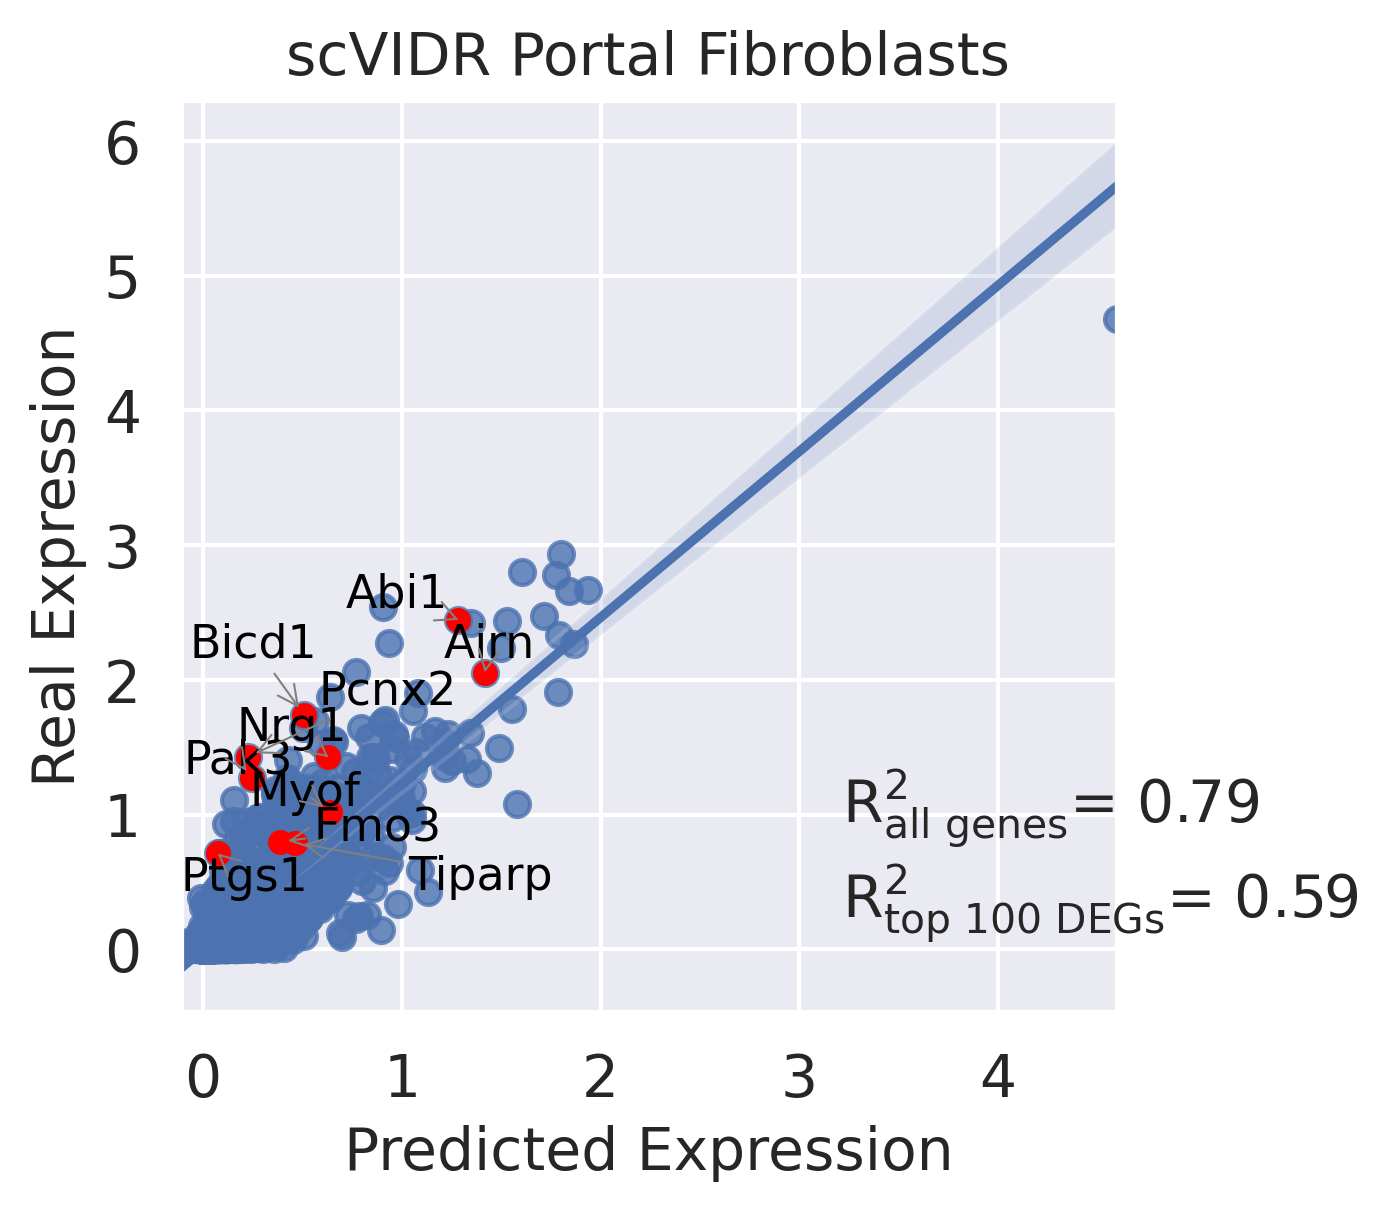

In [4]:
for cell in ["Cholangiocytes", "Portal Fibroblasts"]:
    print(cell)
    #Training model
    train_adata, test_adata = prepare_data(adata, "celltype", "dose", cell, "30", normalized = True)
    train_adata.obs["cell_dose"] = [f"{j}_{str(i)}" for (i,j) in zip(train_adata.obs["Dose"], train_adata.obs["celltype"])]
    model = VIDR(train_adata, linear_decoder = False)
#     model.train(
#     max_epochs=100,
#     batch_size=128,
#     early_stopping=True,
#     early_stopping_patience=25)

#     model.save(f"../data/VAE_Binary_Prediction_Dioxin_5000g_{cell}.pt", overwrite = True)
    vae = model.load(f"../data/VAE_Binary_Prediction_Dioxin_5000g_{cell}.pt/", train_adata)
#Prediction of Each Celltype
    pred, delta, reg = model.predict(
    ctrl_key="0",
    treat_key="30",
    cell_type_to_predict=cell,
    regression = True)
    pred.obs["dose"] = 'pred'
    ctrl_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs["dose"] == "0"))]
    treat_adata = adata[((adata.obs['celltype'] == cell) & (adata.obs["dose"] == "30"))]
    eval_adata2 = ctrl_adata.concatenate(treat_adata, pred)
    treatments = []
    for i in eval_adata2.obs["dose"]:
        if i == "0":
            treatments.append("Control")
        elif i == "30":
            treatments.append("TCDD")
        else:
            treatments.append("scVIDR")
    eval_adata2.obs["Treatment"] = treatments
    CD4T = adata[adata.obs["celltype"] ==cell]
    sc.tl.rank_genes_groups(CD4T, groupby="dose", method="wilcoxon")
    diff_genes = CD4T.uns["rank_genes_groups"]["names"]["30"]
    r2_value = model.reg_mean_plot(
    eval_adata2,
    axis_keys={"x": "pred", "y": "30"},
    gene_list=diff_genes[:10],
    top_100_genes = diff_genes[:100],
    labels={"x": "Predicted Expression", "y": "Real Expression"},
    path_to_save=f"../figures/Figure5E_{cell}.svg",
    show=True,
    legend=False, title = f"scVIDR {cell}")

## Supplementary Figure 5C

In [6]:
dists = []
ctrl_size = []
treat_size = []
mmd = geomloss.SamplesLoss("sinkhorn")
for cell in cell_types_of_int:
    print(cell)
    #Training model
    train_adata, test_adata = prepare_data(adata, "celltype", "dose", cell, "30", normalized = True)
    train_adata.obs["cell_dose"] = [f"{j}_{str(i)}" for (i,j) in zip(train_adata.obs["Dose"], train_adata.obs["celltype"])]
    model = VIDR(train_adata, linear_decoder = False)
    model.train(
    max_epochs=100,
    batch_size=128,
    early_stopping=True,
    early_stopping_patience=25)

    model.save(f"../../data/VAE_Binary_Prediction_Dioxin_5000g_{cell}.pt", overwrite=True)
    vae = model.load(f"../../data/VAE_Binary_Prediction_Dioxin_5000g_{cell}.pt/", train_adata)
    
    #Preparing latent space
    latent_X = vae.get_latent_representation(adata)
    latent_adata = sc.AnnData(X=latent_X, obs=adata.obs.copy())
    cell_dose = [f"{j}_{str(i)}" for (i,j) in zip(adata.obs["Dose"], adata.obs["celltype"])]
    training = ["Train" if i != cell+"_30" else "Test" for i in cell_dose]
    latent_adata.obs["Cell_Dose"] = cell_dose
    latent_adata.obs["Training Split"] = training
    
    #Calculate the latent space distance between the cells
    cell_model = [cell]*len(cell_types_of_int)
    x = latent_adata[((adata.obs['celltype'] == cell) & (adata.obs["dose"] == "0"))]
    y = latent_adata[((adata.obs['celltype'] == cell) & (adata.obs["dose"] == "30"))]
    x_tensor = torch.Tensor(x.X)
    y_tensor = torch.Tensor(y.X)
    stat_dist = mmd(x_tensor, y_tensor)
    dists.append(stat_dist.detach().numpy().tolist())
    ctrl_size.append(x.X.shape[0])
    treat_size.append(y.X.shape[0])
    print(f"{cell}: {stat_dist}")

stat_df = pd.DataFrame({"Cell":cell_types_of_int, "Maximum Mean Discrepancy":dists, "CTRL Size":ctrl_size, "TREAT Size":treat_size})

Hepatocytes - central
INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 17540 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Set SLURM handle signals.


None
Epoch 42/100:  42%|████▏     | 42/100 [03:22<04:40,  4.83s/it, loss=111, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 17540 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
None
INFO     Received view of anndata, making copy.                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18865 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


Hepatocytes - central: 272.31787109375
Hepatocytes - portal
INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 17791 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          
None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Set SLURM handle signals.


Epoch 39/100:  39%|███▉      | 39/100 [03:03<04:46,  4.69s/it, loss=111, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 17791 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
None
INFO     Received view of anndata, making copy.                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18865 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
Hepatocytes - portal: 338.39874267578125
Cholangiocytes
INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Set SLURM handle signals.


None
Epoch 31/100:  31%|███       | 31/100 [01:59<04:26,  3.87s/it, loss=108, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18265 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
None
INFO     Received view of anndata, making copy.                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18865 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


Cholangiocytes: 143.7571563720703
Stellate Cells
INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 18474 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Set SLURM handle signals.


None
Epoch 33/100:  33%|███▎      | 33/100 [01:53<03:50,  3.44s/it, loss=109, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18474 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
None
INFO     Received view of anndata, making copy.                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18865 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


Stellate Cells: 181.10621643066406
Portal Fibroblasts
INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 18789 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Set SLURM handle signals.


None
Epoch 47/100:  47%|████▋     | 47/100 [02:37<02:57,  3.35s/it, loss=108, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18789 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
None
INFO     Received view of anndata, making copy.                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18865 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


Portal Fibroblasts: 243.34303283691406
Endothelial Cells
INFO     Using batches from adata.obs["dose"]                                                
INFO     Using labels from adata.obs["celltype"]                                             
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 16013 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          
None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Set SLURM handle signals.


Epoch 27/100:  27%|██▋       | 27/100 [00:59<02:39,  2.19s/it, loss=93.5, v_num=1]
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 16013 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
None
INFO     Received view of anndata, making copy.                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 18865 cells, 5000 vars, 2 batches,
         6 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


Endothelial Cells: 304.38067626953125


## Supplemental Figure 5A

/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


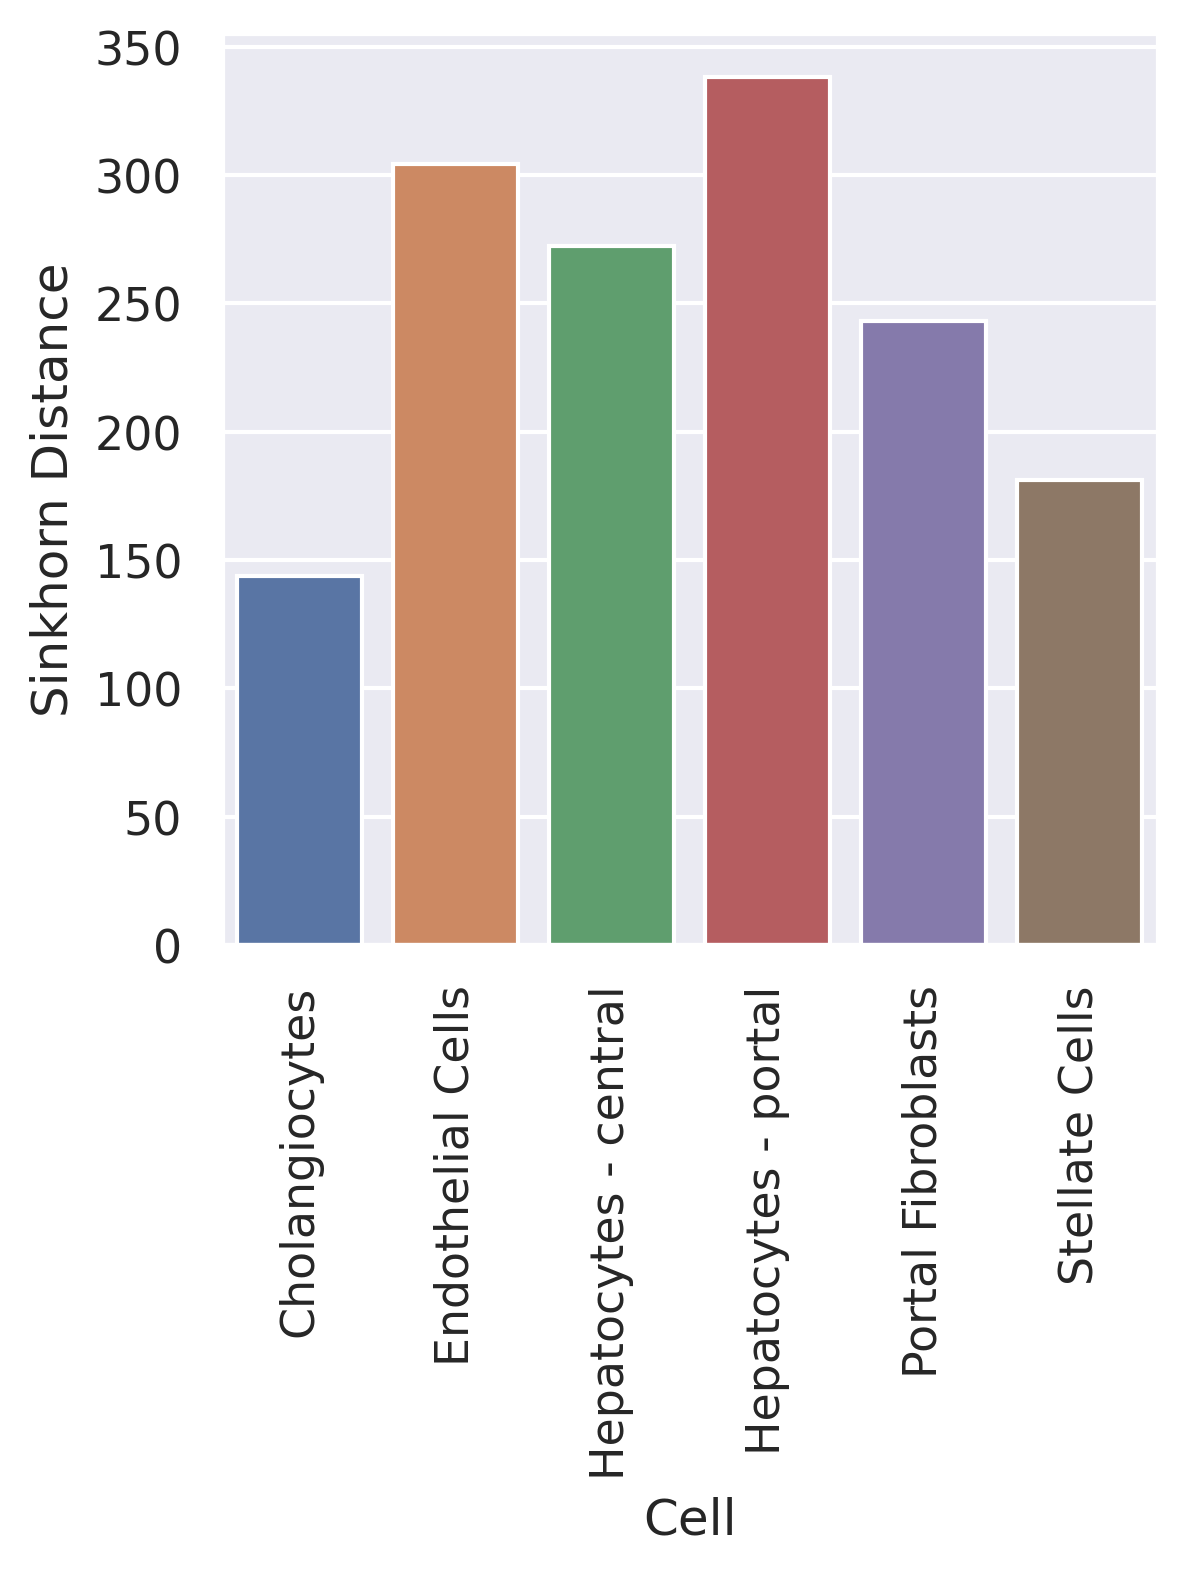

In [7]:
sns.barplot("Cell", "Maximum Mean Discrepancy", data=stat_df, estimator=np.mean, ci=95, capsize=.2, order = sorted(cell_types_of_int))
plt.xticks(rotation = 90)
plt.ylabel("Sinkhorn Distance")
plt.show()

## Supplementary Figure 5B

/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


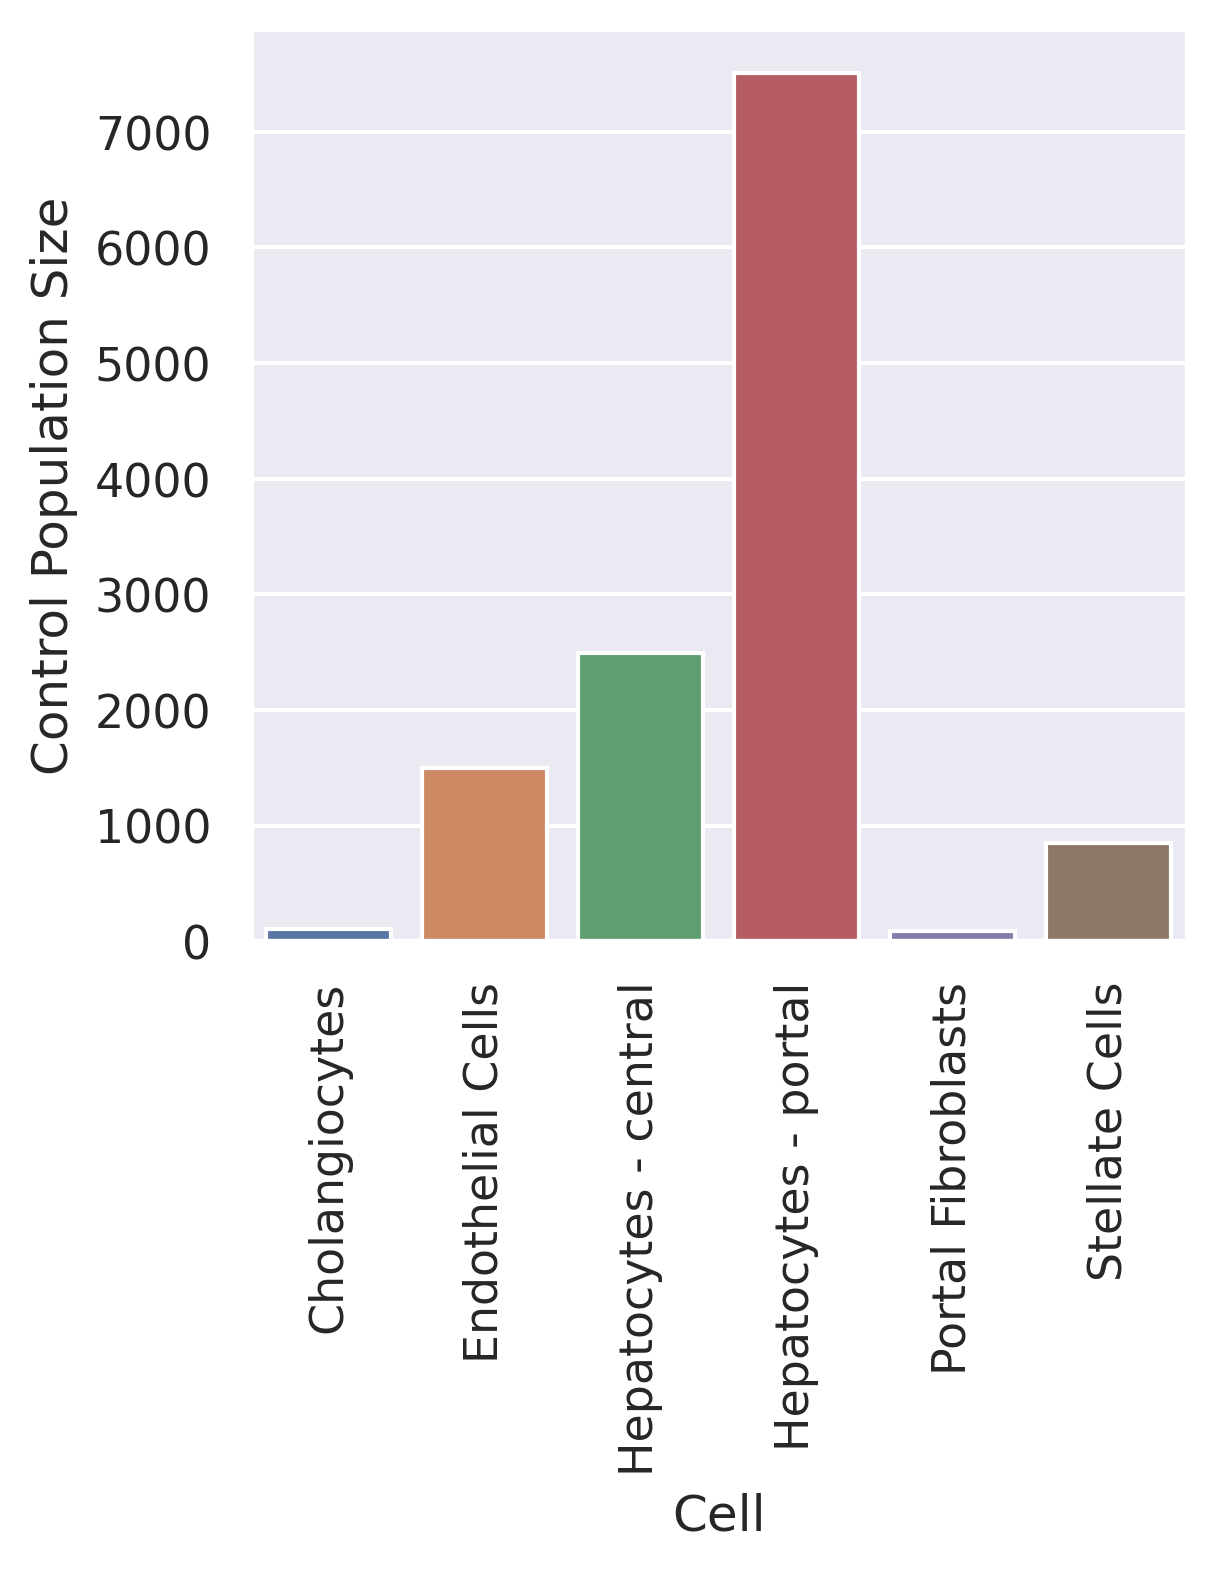

In [8]:
sns.barplot("Cell", "CTRL Size", data=stat_df, estimator=np.mean, ci=95, capsize=.2, order = sorted(cell_types_of_int))
plt.xticks(rotation = 90)
plt.ylabel("Control Population Size")
plt.show()

# Supplementary Figure 5C

See Figure2 notebook for generation of dataframe

In [9]:
r2_values_allCells_df = pd.read_csv("../data/SingleDose_Model_Results.csv")

In [10]:
df = r2_values_allCells_df[r2_values_allCells_df["Gene Set"] == "DEGs"]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cholangiocytes'),
  Text(1, 0, 'Endothelial Cells'),
  Text(2, 0, 'Hepatocytes - central'),
  Text(3, 0, 'Hepatocytes - portal'),
  Text(4, 0, 'Portal Fibroblasts'),
  Text(5, 0, 'Stellate Cells')])

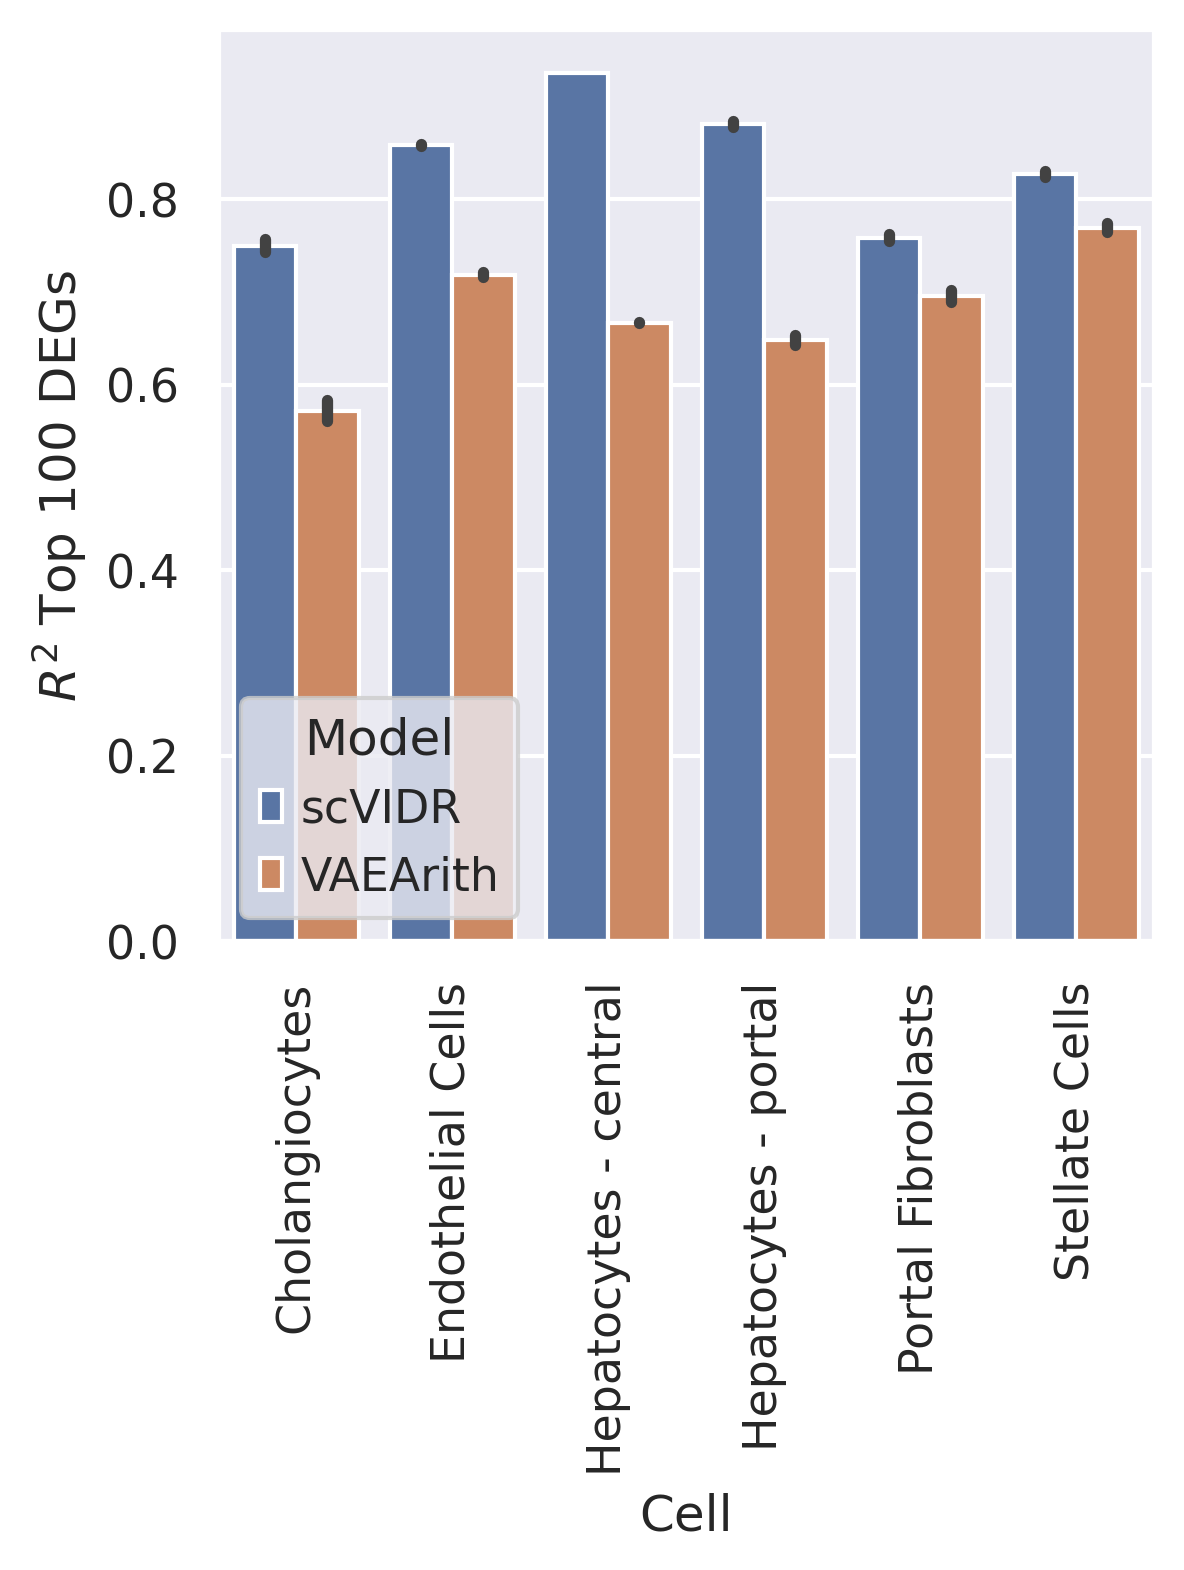

In [11]:
order = ['scVIDR', 'VAEArith']
hue_order = ["All HVGs", "DEGs"]
ax = sns.barplot(x = "Cell", y = "R^2",  data = r2_values_allCells_df, hue = "Model", hue_order=order)
plt.ylabel("$R^2$ Top 100 DEGs")
plt.xticks(rotation = 90)
plt.show()

See Figure3 notebook for generation of dataframe

In [20]:
r2_values_allCells_df = pd.read_csv("../data/Continuous_Comparison_r2Values.csv")

In [21]:
df = r2_values_allCells_df[r2_values_allCells_df["Gene Set"] == "DEGs"]

In [22]:
doses = [0.0,0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0]

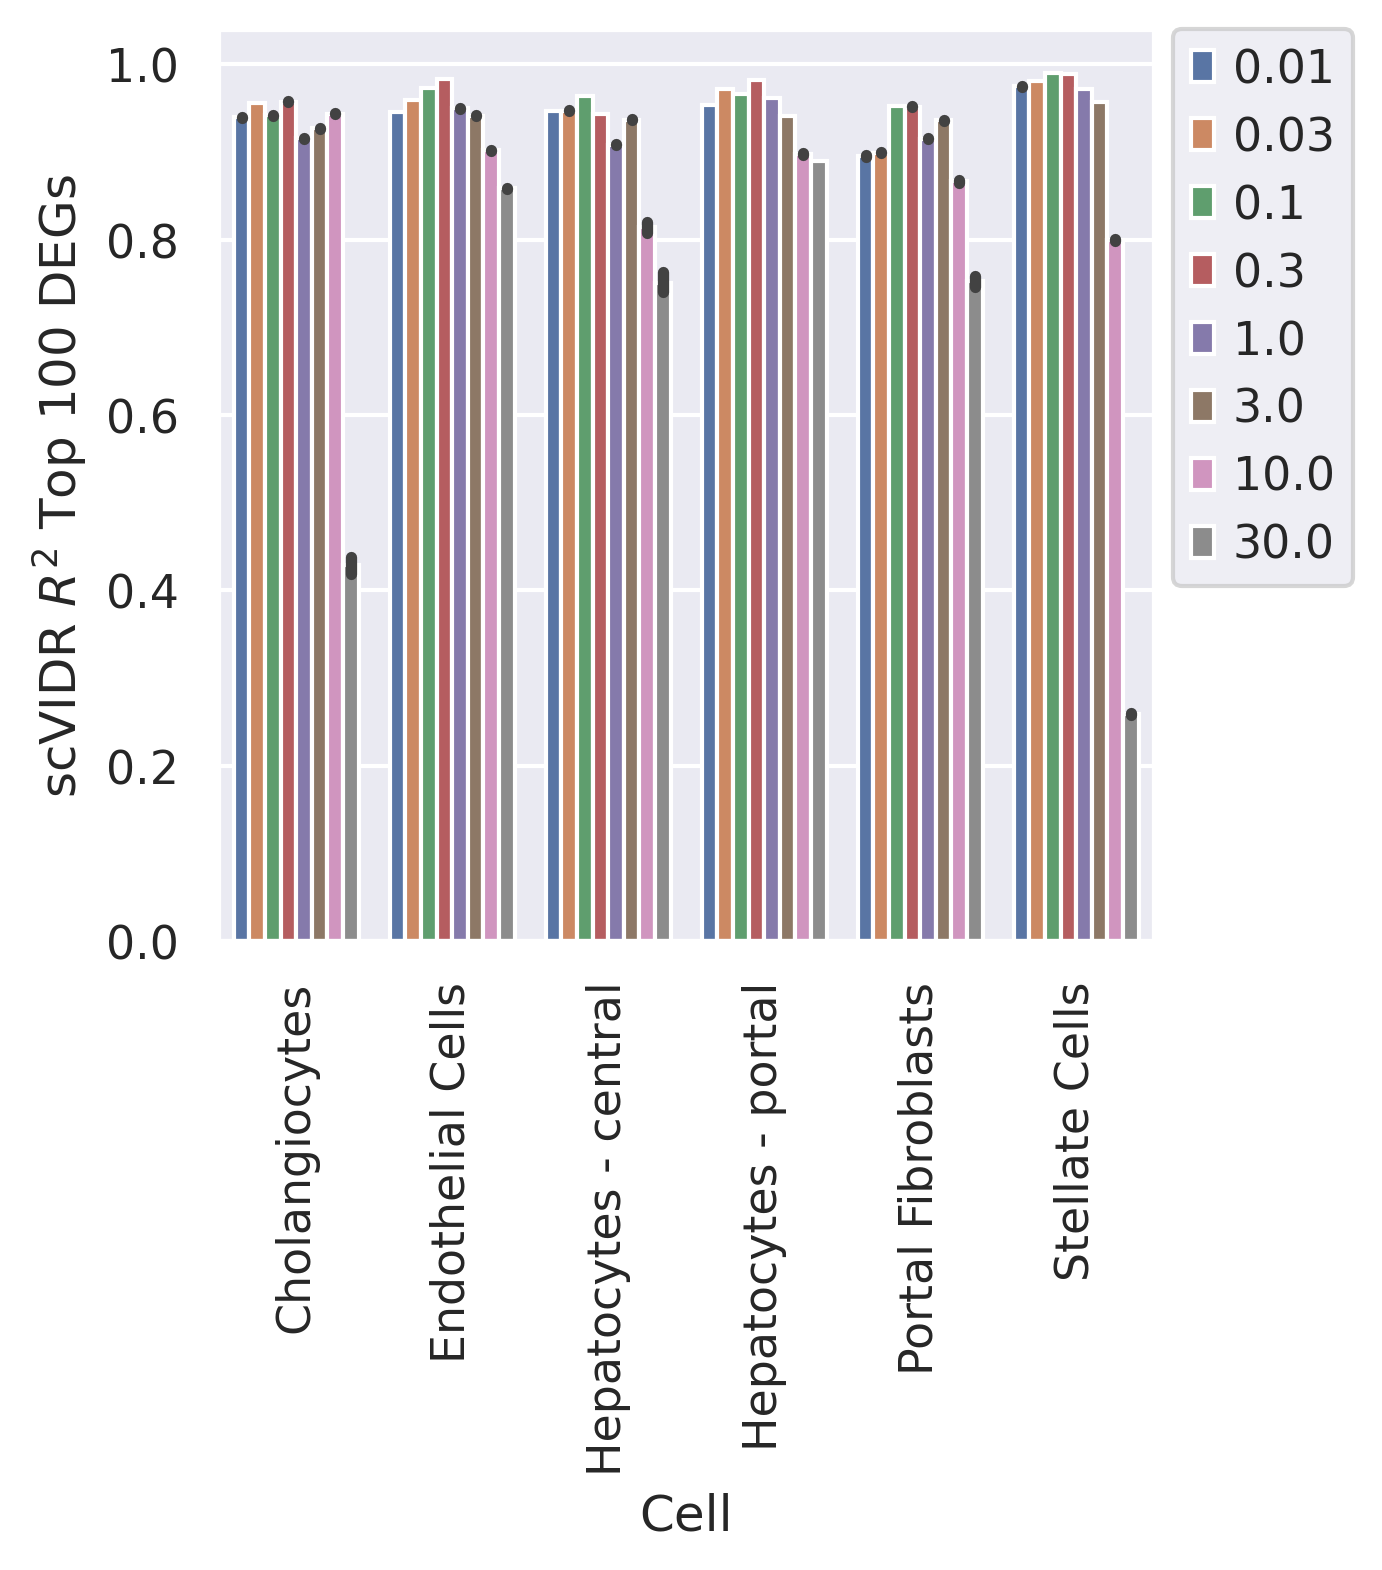

In [28]:
order = [i for i in doses][1:]
ax = sns.barplot(x = "Cell", y = "R^2",  data = df, hue = "Dose", hue_order = order)
plt.xticks(rotation = 90)
plt.ylabel("scVIDR $R^2$ Top 100 DEGs")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

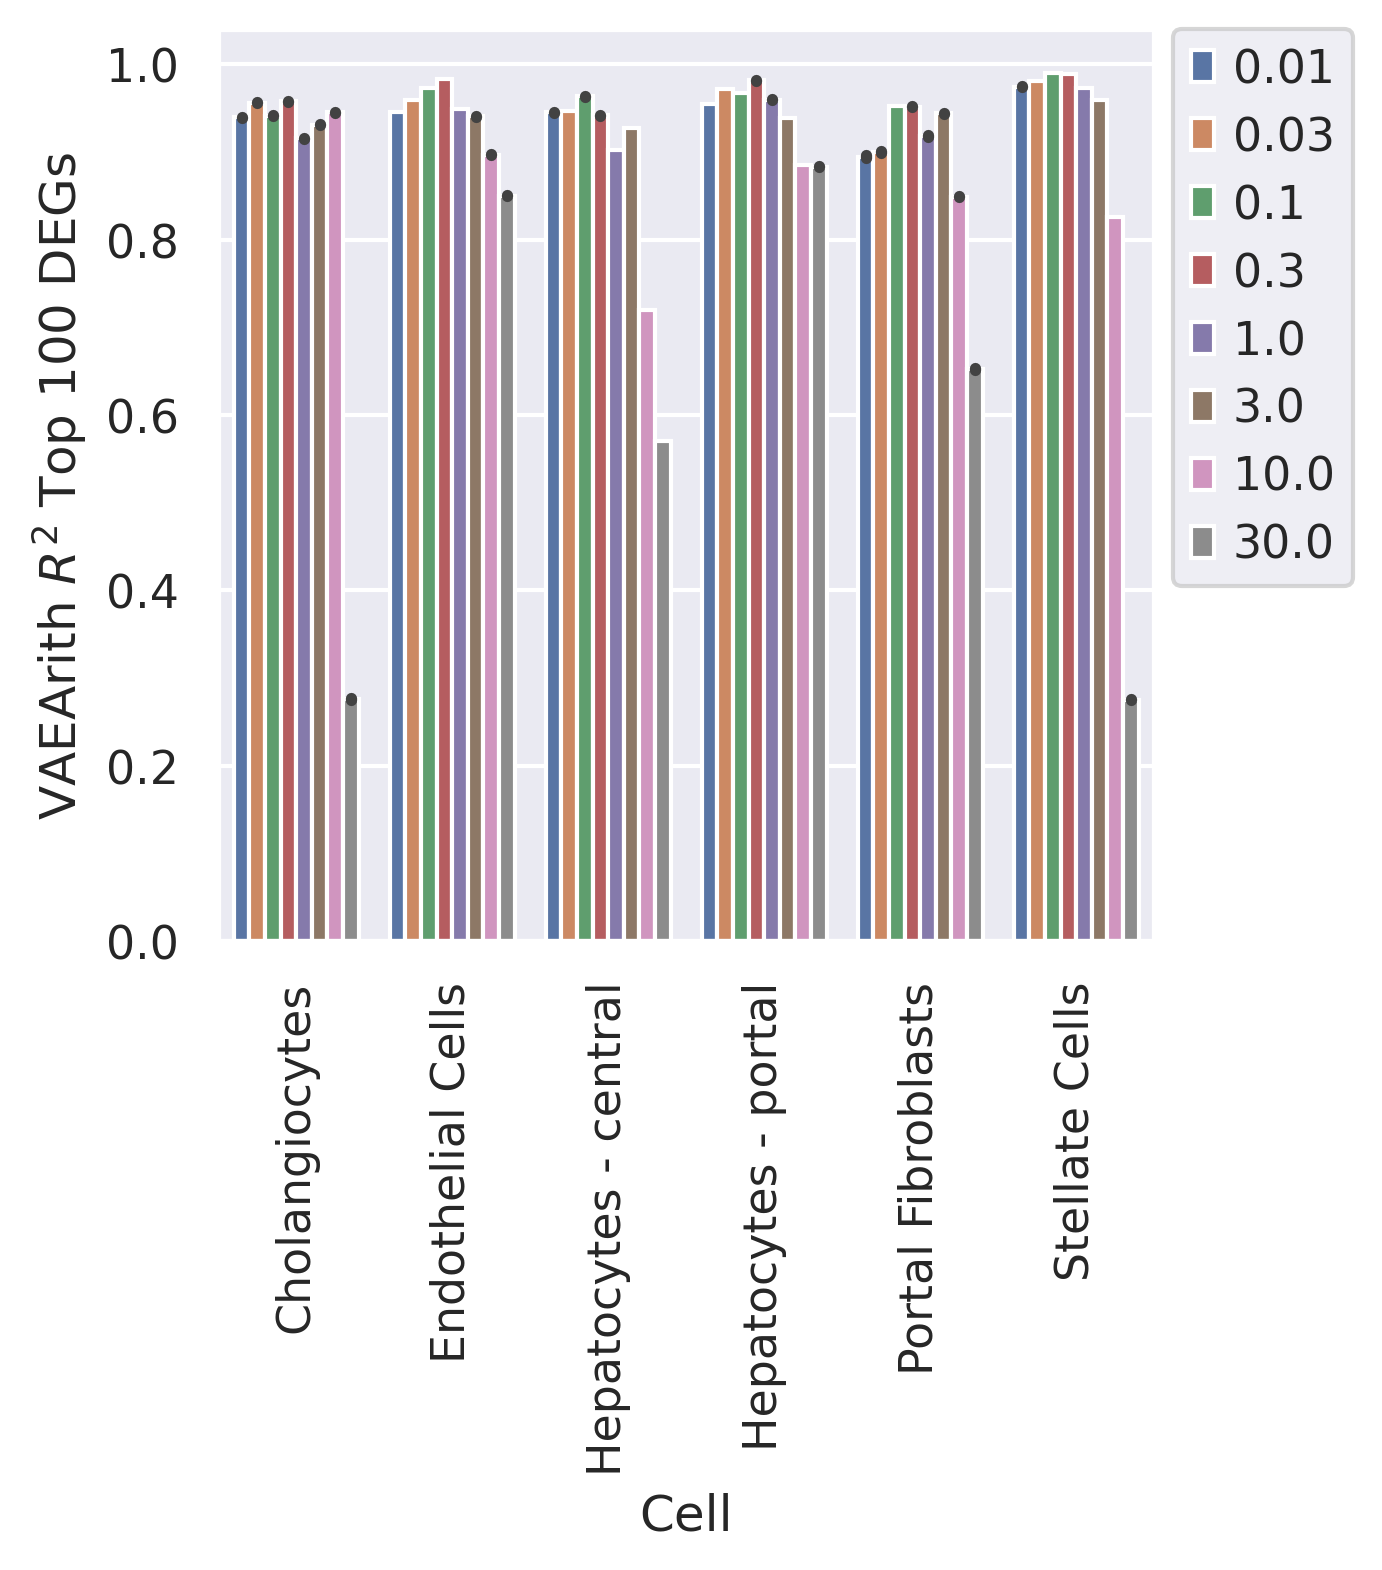

In [29]:
order = doses[1:]
hue_order = cell_types_of_int
ax = sns.barplot(x = "Cell", y = "R^2",  data = df[df["Model"] == "VAEArith"], hue = "Dose", hue_order = order)
plt.xticks(rotation = 90)
plt.ylabel("VAEArith $R^2$ Top 100 DEGs")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()